In [ ]:
#http://www.fsma.edu.br/si/edicao4/FSMA_SI_2009_2_Tutorial.pdf
#http://www.vision.ime.usp.br/~pmiranda/mac6903_2s12/aulas/aula18.pdf
#https://www.kaggle.com/esanvsh/iris-clustering-with-k-means-hierarchical
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
#https://github.com/tanvirrazin/Machine-Learning-A-Z-Udemy/blob/master/part_4-clustering/hc-clustering/hc_clustering.py


### passo a passo do hierarquico: 
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

In [4]:
iris_aux = datasets.load_iris()
iris = pd.DataFrame(iris_aux.data, columns=iris_aux.feature_names)
iris['target'] = pd.Series(iris_aux.target)
iris['species'] = pd.Categorical.from_codes(iris_aux.target, iris_aux.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
X = iris.iloc[:,:4]

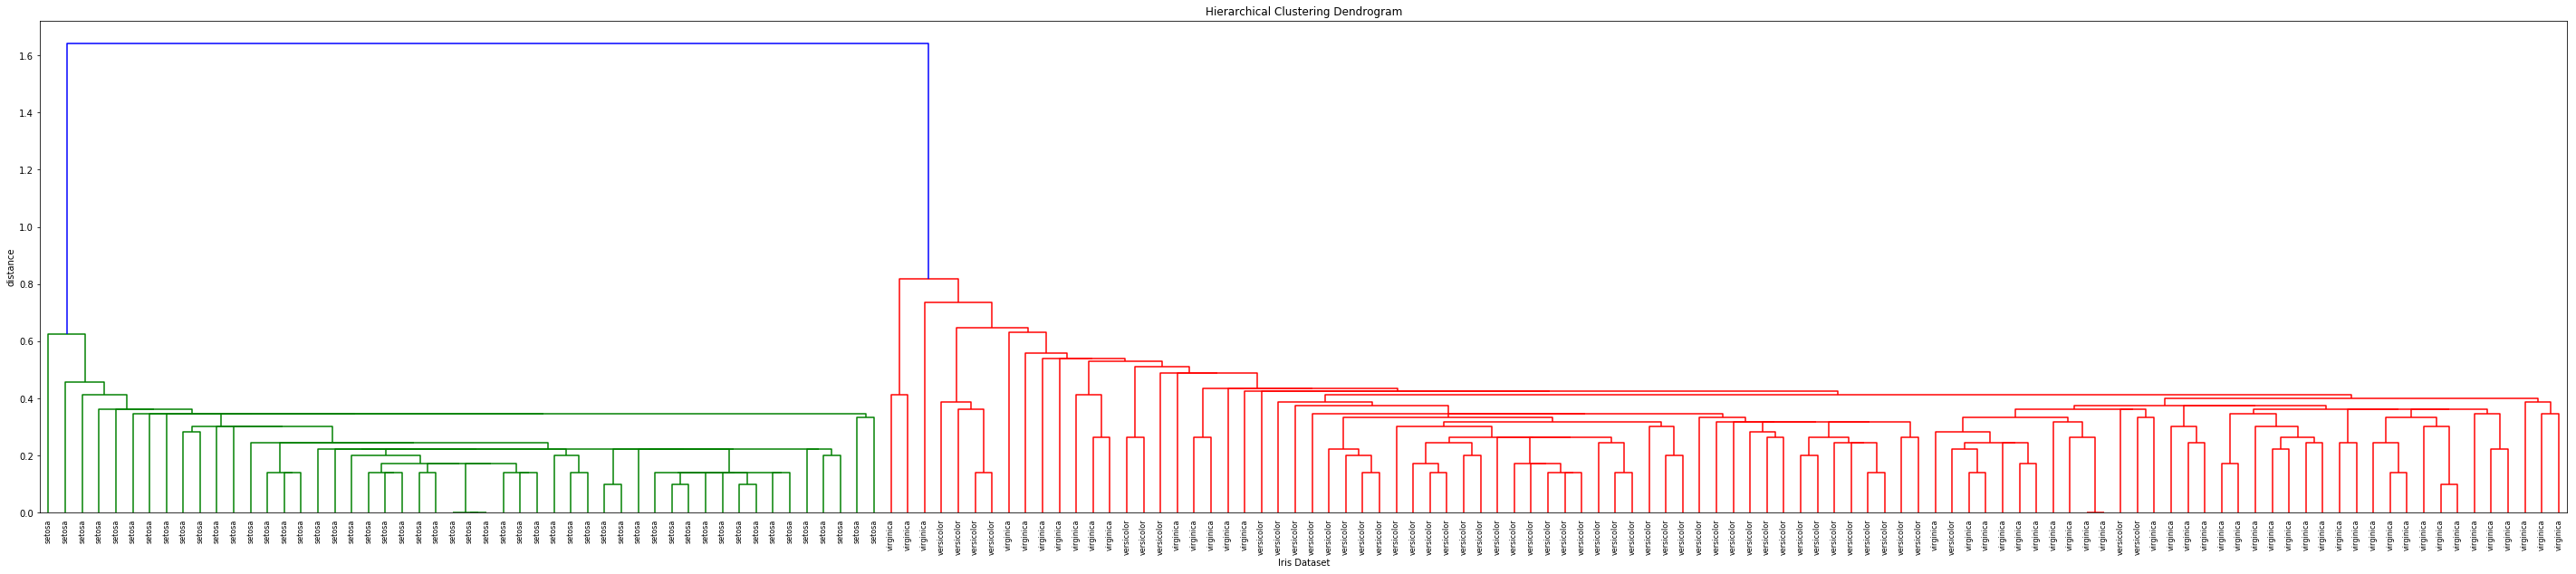

In [20]:
#aglomerativo:

Z = linkage(X, method='single', metric='euclidean', optimal_ordering=False)
#Z = linkage(df, 'ward')
labels = np.array(iris['species'])
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Dataset')
plt.ylabel('distance')
dendrogram(Z,labels=labels,leaf_rotation=90.,leaf_font_size=8.)
plt.show()

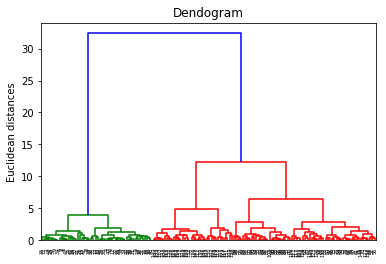

In [21]:
#aglomerativo versão 2:
#ddgm = dendrogram(linkage(X, method='ward'))
ddgm = dendrogram(linkage(X, method='ward', metric='euclidean', optimal_ordering=False))
plt.title('Dendogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()


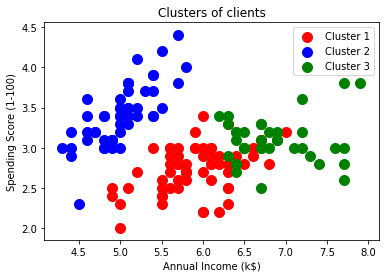

In [26]:
# Fitting hierarchical clustering to the mall dataset
#hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', memory=None, connectivity=None, 
                       compute_full_tree='auto', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualizing the clusters
plt.scatter(X.iloc[y_hc==0, 0], X.iloc[y_hc==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_hc==1, 0], X.iloc[y_hc==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_hc==2, 0], X.iloc[y_hc==2, 1], s=100, c='green', label='Cluster 3')
#plt.scatter(X.iloc[y_hc==3, 0], X.iloc[y_hc==3, 1], s=100, c='cyan', label='Cluster 4')
#plt.scatter(X.iloc[y_hc==4, 0], X.iloc[y_hc==4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [35]:
teste = AgglomerativeClustering(n_clusters=3, affinity='euclidean', memory=None, connectivity=None, 
                       compute_full_tree='auto', linkage='ward')
teste.compute_full_tree(X)

TypeError: 'str' object is not callable